# CH21. CNN 이미지 인식

### Convolution

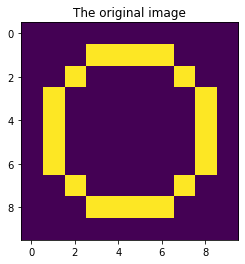

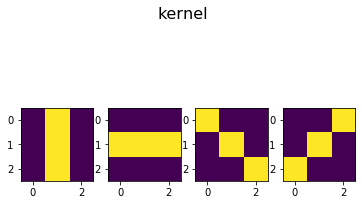

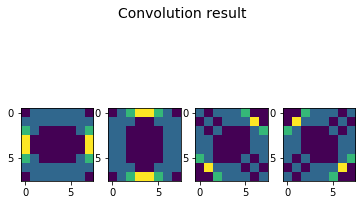

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

#-- 합성곱 층 정의
class Conv:
    #-- W: 3×3고정, no Strides, no Padding
    def __init__(self, W):
        self.W = W
    #
    def f_prop(self, X):
        #print(X.shape[0]) #: 10
        #print(X.shape[1]) #: 10
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                #-- 각 요소별 곱의 합계
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

    
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

#-- 커널 설정
W1 = np.array([[0,1,0],[0,1,0],[0,1,0]])
W2 = np.array([[0,0,0],[1,1,1],[0,0,0]])
W3 = np.array([[1,0,0],[0,1,0],[0,0,1]])
W4 = np.array(([0,0,1],[0,1,0],[1,0,0]))

plt.subplot(1,4,1); plt.imshow(W1)
plt.subplot(1,4,2); plt.imshow(W2)
plt.subplot(1,4,3); plt.imshow(W3)
plt.subplot(1,4,4); plt.imshow(W4)
plt.suptitle("kernel", fontsize=16)
plt.show()

#-- convolution multiply
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)



#
plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=14)
plt.show()

### Pooling

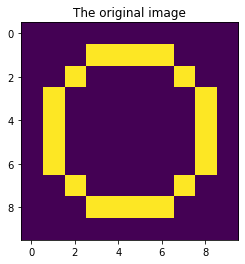

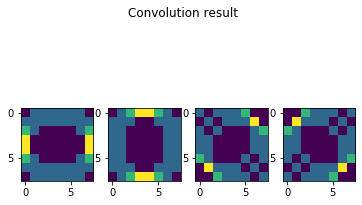

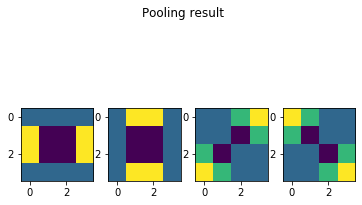

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

#--
class Conv:
    #-
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

#--pooling
class Pool:
    #
    def __init__(self, l):
        self.l = l
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                #-
                out[i,j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

#--
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

#
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)
#
plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

#--
pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1,4,1); plt.imshow(P1)
plt.subplot(1,4,2); plt.imshow(P2)
plt.subplot(1,4,3); plt.imshow(P3)
plt.subplot(1,4,4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

### Keras model

In [5]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

#- instance
model = Sequential()
# --------------------------------------------------------------
model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32,
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
# --------------------------------------------------------------

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               5538048   
_________________________________________________________________
activation_7 (Activation)    (None, 256)              

### CNN을 이용한 분류 (MNIST)

Train on 300 samples, validate on 100 samples
Epoch 1/50
300/300 [==============================] - 1s 5ms/step - loss: 13.4283 - acc: 0.1333 - val_loss: 14.8287 - val_acc: 0.0800
Epoch 2/50
300/300 [==============================] - 0s 599us/step - loss: 13.6754 - acc: 0.1433 - val_loss: 13.2168 - val_acc: 0.1800
Epoch 3/50
300/300 [==============================] - 0s 591us/step - loss: 13.7034 - acc: 0.1467 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 4/50
300/300 [==============================] - 0s 593us/step - loss: 13.9190 - acc: 0.1333 - val_loss: 13.3780 - val_acc: 0.1700
Epoch 5/50
300/300 [==============================] - 0s 621us/step - loss: 12.9488 - acc: 0.1800 - val_loss: 12.9444 - val_acc: 0.1900
Epoch 6/50
300/300 [==============================] - 0s 601us/step - loss: 12.4528 - acc: 0.2233 - val_loss: 11.8565 - val_acc: 0.2500
Epoch 7/50
300/300 [==============================] - 0s 611us/step - loss: 12.5231 - acc: 0.2167 - val_loss: 11.9363 - val_acc: 0.2200
Epoc

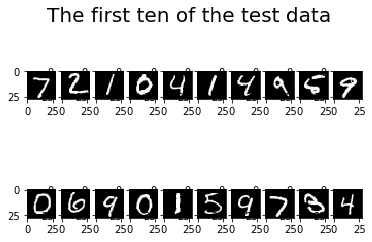

[7 2 1 0 4 1 9 9 4 9 0 0 9 0 1 5 9 7 2 4]
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_78 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_79 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_19 

In [21]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#-MNIST Data load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#-- Training:300, Testing:100
# Conv 4차원 배열 (배치 크기×가로×세로×채널 수)
# MNIST 데이터 : RGB 이미지가 아니라 원래 3차원 데이터이므로 미리 4차원으로 변환
X_train = X_train[:300].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

# 모델 정의
model = Sequential()
#--
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#--
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adadelta',
              metrics   = ['accuracy'])
#--
model.fit(X_train, y_train,
          batch_size      = 128,
          epochs          = 50,
          verbose         = 1,
          validation_data = (X_test, y_test))

#-- 정확도
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#-- 데이터를 시각화,,   테스트 데이터
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

#-- 예측
pred = np.argmax(model.predict(X_test[0:20]), axis=1)
print(pred)

#-- summary
model.summary()

Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 14.0266 - acc: 0.0867
Epoch 2/50
300/300 [==============================] - 0s 1ms/step - loss: 13.5295 - acc: 0.1200
Epoch 3/50
300/300 [==============================] - 0s 1ms/step - loss: 13.5516 - acc: 0.1100
Epoch 4/50
300/300 [==============================] - 0s 1ms/step - loss: 13.3866 - acc: 0.1267
Epoch 5/50
300/300 [==============================] - 0s 1ms/step - loss: 13.1911 - acc: 0.1233
Epoch 6/50
300/300 [==============================] - 0s 1ms/step - loss: 12.8699 - acc: 0.1400
Epoch 7/50
300/300 [==============================] - 0s 1ms/step - loss: 12.7021 - acc: 0.1467
Epoch 8/50
300/300 [==============================] - 0s 1ms/step - loss: 12.7797 - acc: 0.1500
Epoch 9/50
300/300 [==============================] - 0s 1ms/step - loss: 12.7740 - acc: 0.1433
Epoch 10/50
300/300 [==============================] - 0s 1ms/step - loss: 12.8494 - acc: 0.1500
Epoch 11/50
300/300 [==================

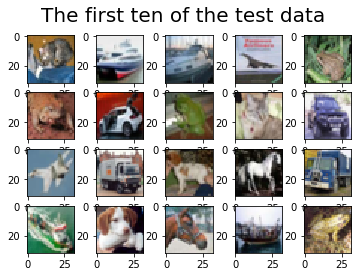

[6 8 0 8 6 6 1 6 3 1 0 1 3 1 1 6 3 3 8 7]
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_82 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_83 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_49 (

In [22]:
import keras
from keras.datasets import cifar10
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#-
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#-- 0 : airplane
#-- 1 : automobile
#-- 2 : bird
#-- 3 : cat
#-- 4 : deer
#-- 5 : dog
#-- 6 : frog
#-- 7 : horse
#-- 8 : ship
#-- 9 : truck


#- 300 ea / 100 ea
X_train = X_train[:300]
X_test = X_test[:100]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]


#--- NN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# --------------------------------------------------------------
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# --------------------------------------------------------------
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#- compile
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss      = 'categorical_crossentropy',
              optimizer = opt,
              metrics   = ['accuracy'])

#- training
model.fit(X_train, y_train, batch_size=32, epochs=50)

#- weight save
model.save_weights('param_cifar10.hdf5')

#- accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#- visualize
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

#-- predict
pred = np.argmax(model.predict(X_test[0:20]), axis=1)
print(pred)

#- summary
model.summary()

### Hyper parameters - Filters

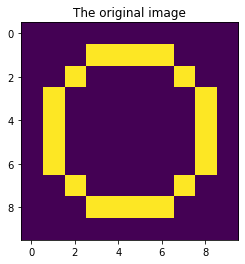

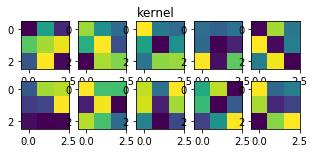

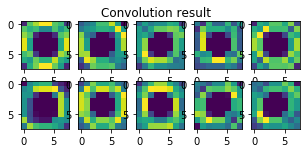

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#- convolution  1 channel
class Conv:
    def __init__(self, filters):
        self.filters = filters
        self.W = np.random.rand(filters, 3, 3)
    def f_prop(self, X):
        out = np.zeros((filters, X.shape[0]-2, X.shape[1]-2))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+3, j:j+3]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

#-    
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

#
filters=10

#- create convolution
conv = Conv(filters=filters)

# 합성곱 실행
C = conv.f_prop(X)
# --------------------------------------------------------------
# 시각화를 위한 코드
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()


#--
plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(conv.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()

#--
plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

### Kernel Size

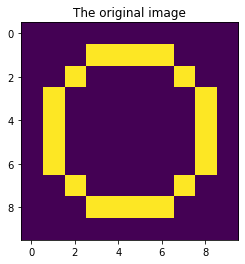

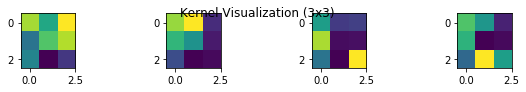

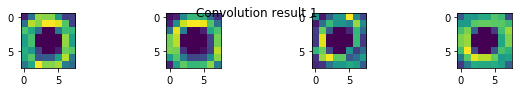

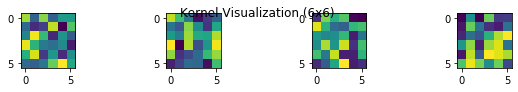

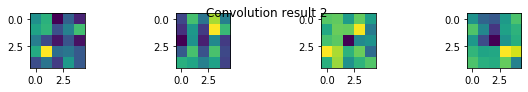

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#
class Conv:
    def __init__(self, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

#
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

#- filter / kernel size
filters = 4
kernel_size = (3,3)
# 합성곱 층을 생성
conv1 = Conv(filters=filters, kernel_size=kernel_size)
# 합성곱을 실행
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (6,6)
# 합성곱 층  생성
conv2 = Conv(filters=filters, kernel_size=kernel_size)
# 합성곱  실행
C2 = conv2.f_prop(X)

#--
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()


#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(conv1.W[i])
plt.suptitle('Kernel Visualization (3x3)', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(C1[i])
plt.suptitle('Convolution result 1', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(conv2.W[i])
plt.suptitle('Kernel Visualization (6x6)', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(C2[i])
plt.suptitle('Convolution result 2', fontsize=12)
plt.show()

### Strides

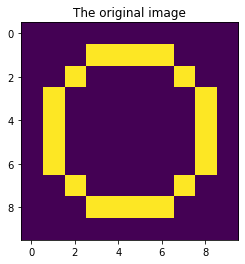

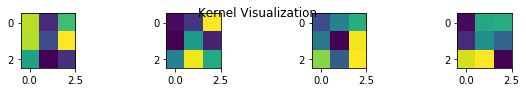

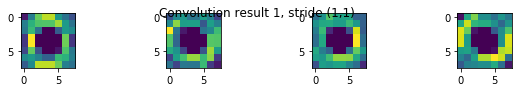

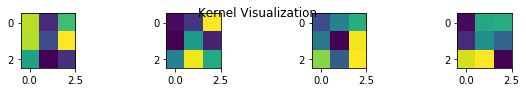

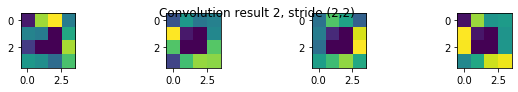

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#
class Conv:
    def __init__(self, filters, kernel_size, strides):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h = self.kernel_size[0]
        k_w = self.kernel_size[1]
        s_h = self.strides[0]
        s_w = self.strides[1]
        out = np.zeros((filters, (X.shape[0]-k_h)//s_h+1, 
                        (X.shape[1]-k_w)//s_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

#
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

# 합성곱 1
filters = 4
kernel_size = (3,3)
strides = (1,1)
# 합성곱 층을 생성
conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)
# 합성곱을 실행
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (3,3)
strides = (2,2)
# 합성곱 층을 생성
conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)
conv2.W = conv1.W # 커널을 통일
# 합성곱을 실행
C2 = conv2.f_prop(X)

# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제
    plt.imshow(conv1.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제
    plt.imshow(C1[i])
plt.suptitle('Convolution result 1, stride (1,1)', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제
    plt.imshow(conv2.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제
    plt.imshow(C2[i])
plt.suptitle('Convolution result 2, stride (2,2)', fontsize=12)
plt.show()

### Padding

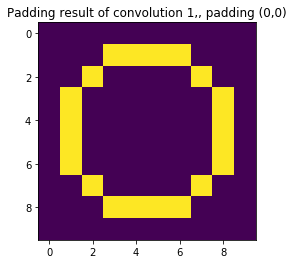

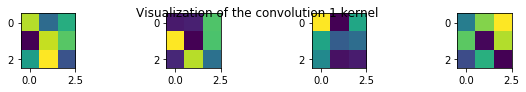

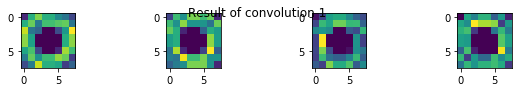

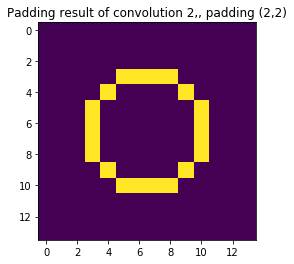

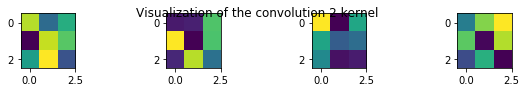

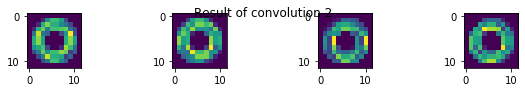

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


#
class Conv:
    def __init__(self, filters, kernel_size, strides, padding):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding
        out = np.zeros((filters, (X.shape[0]+p_h*2-k_h)//s_h+1, 
                        (X.shape[1]+p_w*2-k_w)//s_w+1))
        #
        X = np.pad(X, ((p_h, p_h), (p_w, p_w)), 'constant', 
                   constant_values=((0,0),(0,0)))
        self.X = X # 나중에 패딩 결과를 시각화하기 위해 저장
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

#
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

# 합성곱 1
filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (0,0)
# 합성곱 층을 생성
conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, 
             padding=padding)
# 합성곱을 실행
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (2,2)
# 합성곱 층을 생성
conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
conv2.W = conv1.W # 가중치를 통일합니다
# 합성곱을 실행
C2 = conv2.f_prop(X)

#---
plt.imshow(conv1.X)
plt.title('Padding result of convolution 1,, padding (0,0)', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(conv1.W[i])
plt.suptitle('Visualization of the convolution 1 kernel', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(C1[i])
plt.suptitle('Result of convolution 1', fontsize=12)
plt.show()

#--
plt.imshow(conv2.X)
plt.title('Padding result of convolution 2,, padding (2,2)', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(conv2.W[i])
plt.suptitle('Visualization of the convolution 2 kernel', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제
    plt.imshow(C2[i])
plt.suptitle('Result of convolution 2', fontsize=12)
plt.show()

### Pooling Size

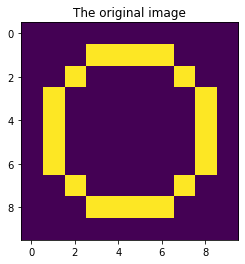

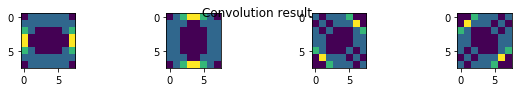

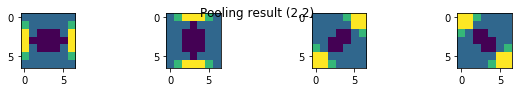

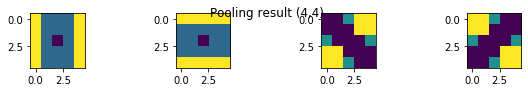

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#--
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   # kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out


#-- pool  max.
class Pool:
    def __init__(self, pool_size):
        self.pool_size = pool_size
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        out = np.zeros((X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i:i+k_h, j:j+k_w])
        return out

#
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1 - (2,2)
pool_size = (2,2)
pool1 = Pool(pool_size)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2 - (4,4)
pool_size = (4,4)
pool2 = Pool(pool_size)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result (2,2)', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result (4,4)', fontsize=12)
plt.show()

### strides pooling

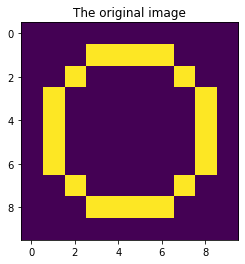

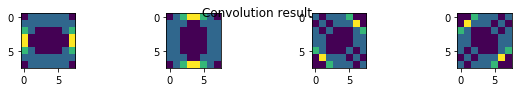

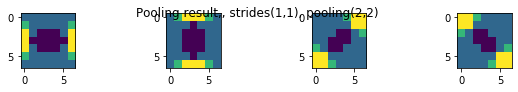

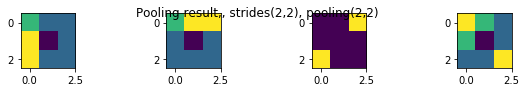

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#--
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

#--
class Pool:
    def __init__(self, pool_size, strides):
        self.pool_size = pool_size
        self.strides = strides
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides
        out = np.zeros(((X.shape[0]-k_h)//s_h+1, (X.shape[1]-k_w)//s_w+1))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

#--
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

#--
local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (1,1)
pool1 = Pool(pool_size, strides)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2
pool_size = (3,3)
strides = (2,2)
pool2 = Pool((3,3), (2,2))
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

#--
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

#
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result,, strides(1,1), pooling(2,2)', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result,, strides(2,2), pooling(2,2)', fontsize=12)
plt.show()

### padding  pooling

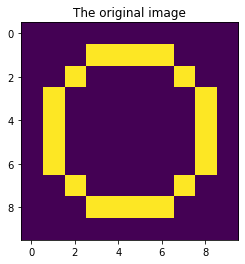

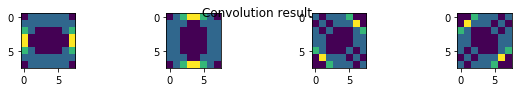

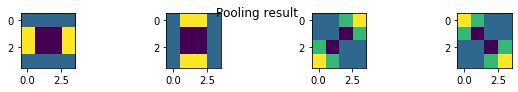

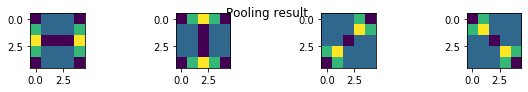

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

#--
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                         kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out


#
class Pool:
    def __init__(self, pool_size, strides, padding):
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding
        out = np.zeros(((X.shape[0]+p_h*2-k_h)//s_h+1, 
                        (X.shape[1]+p_w*2-k_w)//s_w+1))
        X = np.pad(X, ((p_h,p_h),(p_w,p_w)), 'constant', 
                   constant_values=((0,0),(0,0)))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (2,2)
padding = (0,0)
pool1 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2
pool_size = (2,2)
strides = (2,2)
padding = (1,1)
pool2 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

#--
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

### 연습 문제

In [34]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

#-- model instance
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32,
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Flatten())
model.add(Dense(256))


#-- active function : sigmoid
model.add(Activation('sigmoid'))
model.add(Dense(128))

#-- active function : sigmoid
model.add(Activation('sigmoid'))
model.add(Dense(10))

#-- active function : softmax
model.add(Activation('softmax'))


#
model.summary() 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               5538048   
_________________________________________________________________
activation_88 (Activation)   (None, 256)             